### YFINANCE, instalación
#### Para trabajar con datos financieros de Yahoo Finance, primero necesito instalar la biblioteca de yfinance, para eso utilizamos el siguiente comando. Con ella podre descargar cotizaciones de acciones y muchos datos financieros de compañias que cotizan en bolsa.

In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### OPENPYXL, instalación
#### Ejecutamos el siguiente comando exportar o importar archvios en formato excel.  En mi caso lo utilizaré para poder exportar archivos en formato Excel.

In [2]:
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### ADJUSTTEXT, instalación
#### El siguiente comando lo he utilizado para poder ajustar las etiquitas  en gráficos. Me ha sido útil para que las etiquetas no se superpongan.

In [3]:
pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### INSTALACION DE LIBRERIAS CON LAS QUE TRABAJARE
*  Pandas Lo utilizaré para la creación y manipulación de DataFrames.
*  Numpy lo utilizaré en algún momento para algun tipo de cálculo.
*  Yfinance, para descargar datos financieros.
*  Datetime para manipular fechas y horas.
*  Matplotlib para la crear gráficos.
*  Matplotlib Ticker para personalización de los ticks en los gráficos
*  Seaborn para crear otro tipo de gráficos.
*  Warnings utilizada para manejar y controlar las advertencias en el código.


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
import random
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
from adjustText import adjust_text
warnings.simplefilter(action='ignore', category=FutureWarning)

#### ACCIONES SELECCIONADAS - CREACION DATAFRAME
Para lo siguiente he seleccionado un conjunto de acciones, de tres sectores princiaples:
*  Tecnológico-Comunicación, 
* Consumo y 
* Salud
#### DETALLES DE LA SELECCIÓN
He tomado datos, cotizaciones mensuales. Y he considerado como rango de fecha desde inicio del 2019 hasta el 2022. No obstante he puesto como fecha de inicio Diciembre de 2018, porque ala ser mensual toma el cierre de dicho mes, y dicho cierre será el inicio de Enero del 2019.
He creado un DataFrame llamado cotizaciones generales, que toma las acciones que aparecen en la lista.

In [5]:
acc_grales= ['GOOG','META','NFLX','DIS','VZ','CMCSA','SPOT','CHTR','NTES','EA','SONY',
             'AAPL','NVDA','MSFT','TSM','AVGO','ORCL','CRM','SAP','ADBE','AMD','IBM','AMZN','HD','MCD',
             'PG','WMT','ABNB','BABA','NKE','SBUX','KO','BUD','DEO','NVO','JNJ','MRK','PFE','SNY']
fecha_inicio = dt.datetime(2018, 12, 1)
end_date = dt.datetime.now()
cotizac_grales = yf.download(acc_grales, start = fecha_inicio, end= end_date ,interval='1mo', rounding=True)['Adj Close']
cotizac_grales.reset_index(inplace=True)
cotizac_grales['Date'] = pd.to_datetime(cotizac_grales['Date']).dt.tz_localize(None).dt.date
cotizac_grales.set_index('Date', inplace=True)

[*********************100%***********************]  39 of 39 completed


In [6]:
# Identificar columnas con valores nulos y pasarlos a lista
columnas_con_nulos = cotizac_grales.columns[cotizac_grales.isnull().any()].tolist() 
print("Columnas con valores nulos:", columnas_con_nulos)

Columnas con valores nulos: ['ABNB']


In [7]:
# Eliminar columnas con datos nulos
cotizac_grales= cotizac_grales.drop(columns=columnas_con_nulos)


#### VARIACION PORCENTUAL MENSUAL

Aquí procedo a realizar una variación porcentual, que será el DataFrame principal con el que vamos a trabajar. A partir de este, podremos calcular las medidas de rendimiento y volatilidad (riesgo).


In [8]:
# Calculo Variacion Porcentual para calcular la Volatilidad - DesvSTD
variac_porcent_gral = cotizac_grales.pct_change(1).dropna()
variac_porcent_gral

Ticker,AAPL,ADBE,AMD,AMZN,AVGO,BABA,BUD,CHTR,CMCSA,CRM,...,PFE,PG,SAP,SBUX,SNY,SONY,SPOT,TSM,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.054951,0.095385,0.322319,0.144341,0.066382,0.229282,0.161513,0.161701,0.080136,0.109563,...,-0.027605,0.049608,0.038936,0.058083,0.000871,0.037647,0.193392,0.019315,-0.020762,0.034544
2019-02-01,0.040513,0.059237,-0.036051,-0.045962,0.026234,0.086283,0.022373,0.041867,0.057215,0.076867,...,0.029984,0.029539,0.035871,0.031085,-0.042356,-0.041950,0.034625,0.037897,0.044650,0.033046
2019-03-01,0.101572,0.015200,0.084573,0.085986,0.092288,-0.003168,0.074377,0.005799,0.033898,-0.032284,...,-0.020130,0.055861,0.077734,0.063663,0.064223,-0.119527,-0.009562,0.048881,0.038682,-0.014995
2019-04-01,0.056422,0.085407,0.082680,0.081873,0.068227,0.017083,0.059172,0.069989,0.088870,0.044079,...,-0.043932,0.023403,0.116056,0.044927,-0.012240,0.217742,-0.021830,0.069905,-0.032644,0.060217
2019-05-01,-0.127598,-0.063440,-0.007962,-0.078688,-0.209803,-0.195636,-0.084713,0.015114,-0.053090,-0.084315,...,0.022479,-0.026769,-0.044861,-0.020921,-0.075504,-0.046358,-0.075053,-0.124902,-0.039924,-0.013720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,0.031140,0.041258,0.028239,-0.045352,0.013362,0.056944,0.032605,-0.084747,-0.033227,-0.021280,...,-0.036425,0.073524,0.038327,0.213216,0.085891,0.101016,-0.003082,0.035595,0.048153,0.125201
2024-09-01,0.018645,-0.098588,0.104470,0.043866,0.059400,0.273338,0.078939,-0.067503,0.055499,0.082297,...,-0.002450,0.009675,0.042738,0.037128,0.024351,-0.010251,0.074808,0.011457,0.074866,0.048542
2024-10-01,-0.030420,-0.076673,-0.121953,0.000376,-0.012563,-0.076706,-0.104390,0.010892,0.045586,0.066196,...,-0.022105,-0.046344,0.019817,0.002154,-0.082422,-0.088555,0.044962,0.101196,-0.061963,0.014894


#### CALCULO DESVIO STD ANUAL Y RENDIMIENTO ESPERADO ANUAL

Las medidas de retorno y volatilidad obtenidas se han anualizado, ya que los datos se analizan comúnmente en términos anuales. Esta conversión permite una comparación más directa y precisa de los datos a lo largo del tiempo, proporcionando una visión clara del desempeño de las inversiones.


In [9]:
# Ahora sacar informe por volatilidad y Anualizar, y ordenar por mayor volatilidad
desv_std_anual= np.std(variac_porcent_gral,ddof=1)*np.sqrt(12)

# Calculo Rendmiento Esperado Mensual
rendimiento_esperado_mensual = variac_porcent_gral.mean()
rendimiento_esperado_anual = (1 + rendimiento_esperado_mensual) ** 12 - 1


##### VERIFICACION DE COMPAÑIAS CON MAYOR RENDIMIENTO


In [10]:
rendimiento_esperado_anual.sort_values(ascending=False).head(10)


Ticker
NVDA    1.049836
AVGO    0.559140
AMD     0.541323
TSM     0.429069
AAPL    0.421871
SPOT    0.402781
META    0.393635
NVO     0.337409
NFLX    0.335074
MSFT    0.316113
dtype: float64

#### DATAFRAME RESUMEN (con Rendimiento Anual y Desvio Std Anual por acción) 


In [11]:
resultados = pd.DataFrame({ 'Rendimiento Esperado Anual': rendimiento_esperado_anual, 'Desvío Estándar Anual':desv_std_anual}).sort_values(by='Rendimiento Esperado Anual', ascending=False)


In [12]:
resultados

,Rendimiento Esperado Anual,Desvío Estándar Anual
Ticker,,
NVDA,1.049836,0.483386
AVGO,0.559140,0.334372
AMD,0.541323,0.512651
TSM,0.429069,0.353634
AAPL,0.421871,0.283566
SPOT,0.402781,0.486022
META,0.393635,0.398759
NVO,0.337409,0.211679
NFLX,0.335074,0.404600


#### CLASIFICACION DE LAS ACCIONES SEGUN SU VOLATIDAD
Clasificar las acciones según su nivel de volatilidad, diferenciándolas entre las de mayor y menor volatilidad, lo que me permitirá graficarlas y mantenerlas mejor organizadas en el gráfico.

In [13]:
# Clasificar las acciones 
acciones_volatiles = desv_std_anual[desv_std_anual > 0.25].index.tolist()
acciones_conservadoras = desv_std_anual[desv_std_anual <= 0.25].index.tolist()

#### GRAFICO DE ACCIONES SEGÚN RENDIMIENTO Y VOLATILIDAD

El siguiente gráfico muestra cómo se ubican las acciones en un scatter plot de acuerdo a su rendimiento anual y volatilidad.

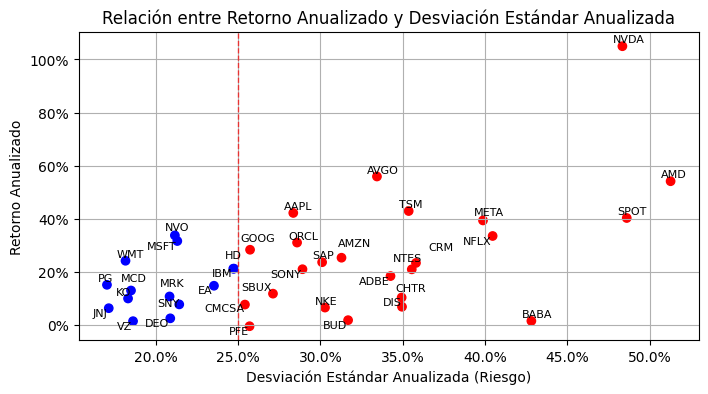

In [14]:
# Crear listas de colores según la clasificación de volatilidad
colors = ['red' if accion in acciones_volatiles else 'blue' for accion in desv_std_anual.index]
# Crear el scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(desv_std_anual, rendimiento_esperado_anual, color=colors)

# Añadir etiquetas de texto a cada punto
texts = []
for i, accion in enumerate(desv_std_anual.index): 
    texts.append(plt.text(desv_std_anual[i], rendimiento_esperado_anual[i], accion, fontsize=8, ha='right'))

adjust_text(texts)

# Configurar el gráfico
plt.title('Relación entre Retorno Anualizado y Desviación Estándar Anualizada')
plt.xlabel('Desviación Estándar Anualizada (Riesgo)')
plt.ylabel('Retorno Anualizado')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.axvline(x=0.25, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True)
plt.show()

#### TEST DE CAPITAL Y EVOLUCIÓN DE LA CUENTA

Para realizar un test con un capital determinado y observar la evolución de la cuenta en cada acción, he utilizado la función `cumprod` para que las variaciones mensuales se vayan acumulando, generando así un saldo continuo.


In [15]:
# Calcular la variación porcentual y el capital final
capital_inicial = 2000
capital_acumulado = pd.DataFrame(index=variac_porcent_gral.index)
for ticker in variac_porcent_gral.columns:
    capital_acumulado[ticker]=round(capital_inicial*(1+variac_porcent_gral[ticker]).cumprod(),2)

capital_acumulado

,AAPL,ADBE,AMD,AMZN,AVGO,BABA,BUD,CHTR,CMCSA,CRM,...,PFE,PG,SAP,SBUX,SNY,SONY,SPOT,TSM,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2109.90,2190.77,2644.64,2288.68,2132.76,2458.56,2323.03,2323.40,2160.27,2219.13,...,1944.79,2099.22,2077.87,2116.17,2001.74,2075.29,2386.78,2038.63,1958.48,2069.09
2019-02-01,2195.38,2320.54,2549.30,2183.49,2188.72,2670.70,2375.00,2420.68,2283.87,2389.70,...,2003.10,2161.23,2152.41,2181.95,1916.96,1988.24,2469.43,2115.89,2045.92,2137.46
2019-03-01,2418.37,2355.82,2764.90,2371.24,2390.71,2662.23,2551.64,2434.71,2361.29,2312.56,...,1962.78,2281.95,2319.72,2320.85,2040.07,1750.59,2445.81,2219.31,2125.06,2105.41
2019-04-01,2554.82,2557.02,2993.50,2565.38,2553.82,2707.71,2702.63,2605.12,2571.14,2414.49,...,1876.55,2335.36,2588.94,2425.12,2015.10,2131.76,2392.42,2374.45,2055.69,2232.19
2019-05-01,2228.83,2394.80,2969.66,2363.52,2018.02,2177.99,2473.68,2644.49,2434.63,2210.91,...,1918.73,2272.84,2472.80,2374.39,1862.95,2032.94,2212.86,2077.88,1973.62,2201.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,12130.61,5077.88,16095.34,4753.66,15390.23,1259.20,2021.05,2439.13,2667.57,3703.43,...,1772.33,4316.38,4888.42,3289.01,3267.13,4590.59,6041.94,10658.57,2009.77,5472.93
2024-09-01,12356.78,4577.26,17776.81,4962.18,16304.41,1603.38,2180.59,2274.49,2815.62,4008.21,...,1767.99,4358.14,5097.34,3411.13,3346.69,4543.53,6493.92,10780.69,2160.23,5738.60
2024-10-01,11980.89,4226.31,15608.88,4964.05,16099.57,1480.40,1952.96,2299.26,2943.97,4273.54,...,1728.91,4156.16,5198.35,3418.47,3070.85,4141.18,6785.90,11871.65,2026.38,5824.07


#### SUPUESTO: CONSTRUCCIÓN DE UN PORTAFOLIO DIVERSIFICADO

El paso siguiente es armar un supuesto con un portafolio de 14 acciones para demostrar cómo vamos disminuyendo el riesgo. Para una demostración más clara, comenzamos con la acción más volátil y luego alternamos con una acción conservadora, y así sucesivamente vamos alternando acciones volátiles y conservadoras, hasta completar el portafolio con 14 acciones (7 volátiles y 7 conservadoras). Aqui aparecen conceptos, como la covarianza y las proporciones sobre cada activo, explicados en el documento de PDF, que son necesarios para armar un Portfolio.


In [16]:
# Lista de Acciones Seleccionadas
acciones_cartera= ['AMD','PG', 'SPOT','JNJ','NVDA','WMT','BABA','KO','NFLX','VZ','META','MCD','CRM','MRK']
cant_acciones = len(acciones_cartera)
# Crear una lista con la propocion de cada portfolio
proporcion = [1/cant_acciones]*cant_acciones
portfolios = []
# Iteracion que llega al nro total de acciones(14) y que me generando un portfolio, donde comienza por una acción y va agreando la siguiente.
for nro in range(1,cant_acciones+1):
    portfolios.append(acciones_cartera[0:nro])

# En lo siguiente, la ideas es ir agregando el desvio std de cada Portfolio que voy generando.
riesgo_portofolio = []

# Por cada portfolio generado, me tome la variacion %, a partir de ahi calcule la covarianza
for nro_port in portfolios:
    df = variac_porcent_gral[nro_port]

    nro_acciones = len(df.columns)
    # aqui se genera una lista, la primera parte define la proporcion de inversion, y la multiplicación determina la longitud de la lista.
    proporcion = [1/nro_acciones] * nro_acciones
    matriz_covarianza = df.cov() * 12  

    varianza_portfolio = np.dot(np.transpose(proporcion), np.dot(matriz_covarianza, proporcion))
    desv_std_portfolio_anual = round(np.sqrt(varianza_portfolio),4)

    riesgo_portofolio.append(desv_std_portfolio_anual) 

In [17]:
# Verificacion de como queda compuesto cada Portfolio
portfolios

[['AMD'],
 ['AMD', 'PG'],
 ['AMD', 'PG', 'SPOT'],
 ['AMD', 'PG', 'SPOT', 'JNJ'],
 ['AMD', 'PG', 'SPOT', 'JNJ', 'NVDA'],
 ['AMD', 'PG', 'SPOT', 'JNJ', 'NVDA', 'WMT'],
 ['AMD', 'PG', 'SPOT', 'JNJ', 'NVDA', 'WMT', 'BABA'],
 ['AMD', 'PG', 'SPOT', 'JNJ', 'NVDA', 'WMT', 'BABA', 'KO'],
 ['AMD', 'PG', 'SPOT', 'JNJ', 'NVDA', 'WMT', 'BABA', 'KO', 'NFLX'],
 ['AMD', 'PG', 'SPOT', 'JNJ', 'NVDA', 'WMT', 'BABA', 'KO', 'NFLX', 'VZ'],
 ['AMD',
  'PG',
  'SPOT',
  'JNJ',
  'NVDA',
  'WMT',
  'BABA',
  'KO',
  'NFLX',
  'VZ',
  'META'],
 ['AMD',
  'PG',
  'SPOT',
  'JNJ',
  'NVDA',
  'WMT',
  'BABA',
  'KO',
  'NFLX',
  'VZ',
  'META',
  'MCD'],
 ['AMD',
  'PG',
  'SPOT',
  'JNJ',
  'NVDA',
  'WMT',
  'BABA',
  'KO',
  'NFLX',
  'VZ',
  'META',
  'MCD',
  'CRM'],
 ['AMD',
  'PG',
  'SPOT',
  'JNJ',
  'NVDA',
  'WMT',
  'BABA',
  'KO',
  'NFLX',
  'VZ',
  'META',
  'MCD',
  'CRM',
  'MRK']]

#### ANÁLISIS DEL RIESGO DE LOS PORTAFOLIOS y DE CADA ACTIVO INDIVIDUAL

En esta sección, determinaré el riesgo de cada portafolio, el riesgo del portafolio final con las 14 acciones completas y el riesgo individual de cada activo como para poder comparar. Más adelante lo graficaremos.


In [18]:
# Verificacion del riesgo de cada Portfolio
riesgo_portofolio

[np.float64(0.5127),
 np.float64(0.2855),
 np.float64(0.2959),
 np.float64(0.2336),
 np.float64(0.2631),
 np.float64(0.2317),
 np.float64(0.2252),
 np.float64(0.2044),
 np.float64(0.2115),
 np.float64(0.1986),
 np.float64(0.206),
 np.float64(0.1951),
 np.float64(0.1991),
 np.float64(0.1895)]

In [19]:
# Riesgo del Portfolio final, completo ya con las 14 acciones.
riesgo_portfolio_final = riesgo_portofolio[-1]
riesgo_portfolio_final

np.float64(0.1895)

In [20]:
# De los activos que forman el Portfolio, cual es su riesgo individual
riesgo_individual = desv_std_anual[acciones_cartera]
riesgo_individual.sort_values(ascending=False)

Ticker
AMD     0.512651
SPOT    0.486022
NVDA    0.483386
BABA    0.428122
NFLX    0.404600
META    0.398759
CRM     0.358058
MRK     0.208462
VZ      0.186281
MCD     0.185041
KO      0.183252
WMT     0.181707
JNJ     0.171534
PG      0.170446
dtype: float64

#### ANÁLISIS DE LOS RENDIMIENTOS DEL PORTAFOLIO Y LOS ACTIVOS

En esta sección, determinaré el rendimiento del portafolio final con 14 acciones, y el rendimiento individual de cada activo.


In [21]:
rendimiento_esperado_anual[acciones_cartera].sort_values(ascending=False)

Ticker
NVDA    1.049836
AMD     0.541323
SPOT    0.402781
META    0.393635
NFLX    0.335074
WMT     0.241755
CRM     0.233581
PG      0.151168
MCD     0.129745
MRK     0.107303
KO      0.099685
JNJ     0.063138
BABA    0.015097
VZ      0.014270
dtype: float64

In [22]:
retorno_esperado_portfolio = (proporcion*rendimiento_esperado_anual[acciones_cartera]).sum()
retorno_esperado_portfolio

np.float64(0.2698850096815615)

#### RIESGO DE CADA PORTAFOLIO

Aquí creo un DataFrame con la secuencia y el riesgo de cada portafolio a medida que se va agregando un activo, mostrando cómo se va reduciendo el riesgo, para luego graficar esta secuencia

In [23]:
risk_portfolio = pd.DataFrame(riesgo_portofolio)
risk_portfolio = pd.DataFrame(riesgo_portofolio, columns=['Riesgo Total'])
risk_portfolio


,Riesgo Total
0,0.5127
1,0.2855
2,0.2959
3,0.2336
4,0.2631
5,0.2317
6,0.2252
7,0.2044
8,0.2115
9,0.1986


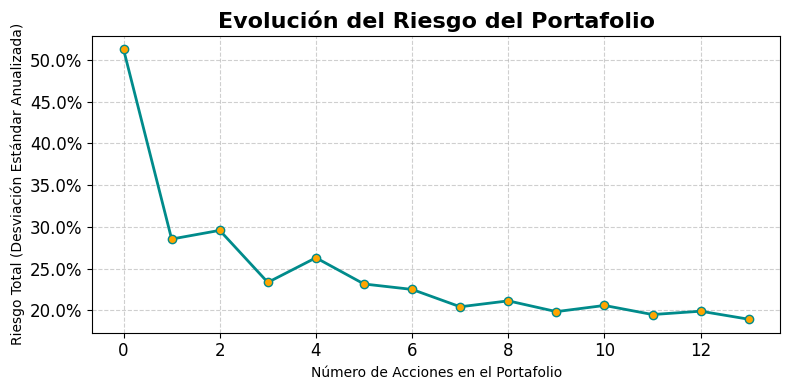

In [24]:
# Grafico con evolucion del riesgo de cada Portfolio
plt.figure(figsize=(8, 4)) 
plt.plot(risk_portfolio, color='darkcyan', linestyle='-', linewidth=2, marker='o', markerfacecolor='orange') 
plt.title('Evolución del Riesgo del Portafolio', fontsize=16, weight='bold') 
plt.xlabel('Número de Acciones en el Portafolio', fontsize=10) 
plt.ylabel('Riesgo Total (Desviación Estándar Anualizada)', fontsize=10) 
plt.grid(True, linestyle='--', alpha=0.6) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.tight_layout() 
plt.show()

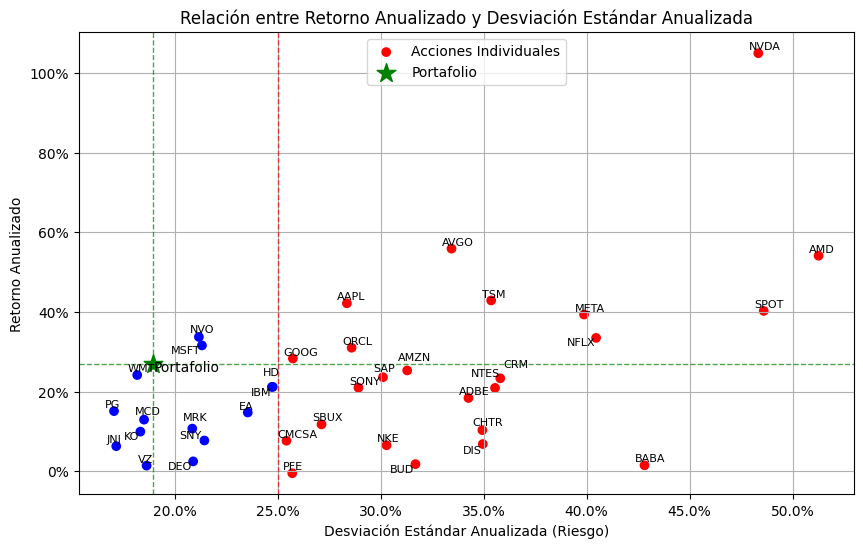

In [25]:


# Crear listas de colores según la clasificación de volatilidad
colors = ['red' if accion in acciones_volatiles else 'blue' for accion in desv_std_anual.index]

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(desv_std_anual, rendimiento_esperado_anual, color=colors, label='Acciones Individuales')

# Añadir etiquetas de texto a cada punto
texts = []
for i, accion in enumerate(desv_std_anual.index): 
    texts.append(plt.text(desv_std_anual[i], rendimiento_esperado_anual[i], accion, fontsize=8, ha='right'))

adjust_text(texts)

# Añadir el punto del portafolio
plt.scatter(desv_std_portfolio_anual, retorno_esperado_portfolio, color='green', marker='*', s=200, label='Portafolio')

# Añadir etiquetas para el punto del portafolio
plt.text(desv_std_portfolio_anual, retorno_esperado_portfolio - 0.02, 'Portafolio', fontsize=10, ha='left')  # Ubicar la etiqueta más abajo

# Añadir líneas punteadas que cruzan el punto del portafolio
plt.axhline(y=retorno_esperado_portfolio, color='green', linestyle='--', linewidth=1, alpha=0.7)
plt.axvline(x=desv_std_portfolio_anual, color='green', linestyle='--', linewidth=1, alpha=0.7)

# Configurar el gráfico
plt.title('Relación entre Retorno Anualizado y Desviación Estándar Anualizada')
plt.xlabel('Desviación Estándar Anualizada (Riesgo)')
plt.ylabel('Retorno Anualizado')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.axvline(x=0.25, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.grid(True)
plt.legend()
plt.show()


#### BOXPLOT - COMPARATIVA DE ACCIONES VOLATILES VS CONSERVADORAS


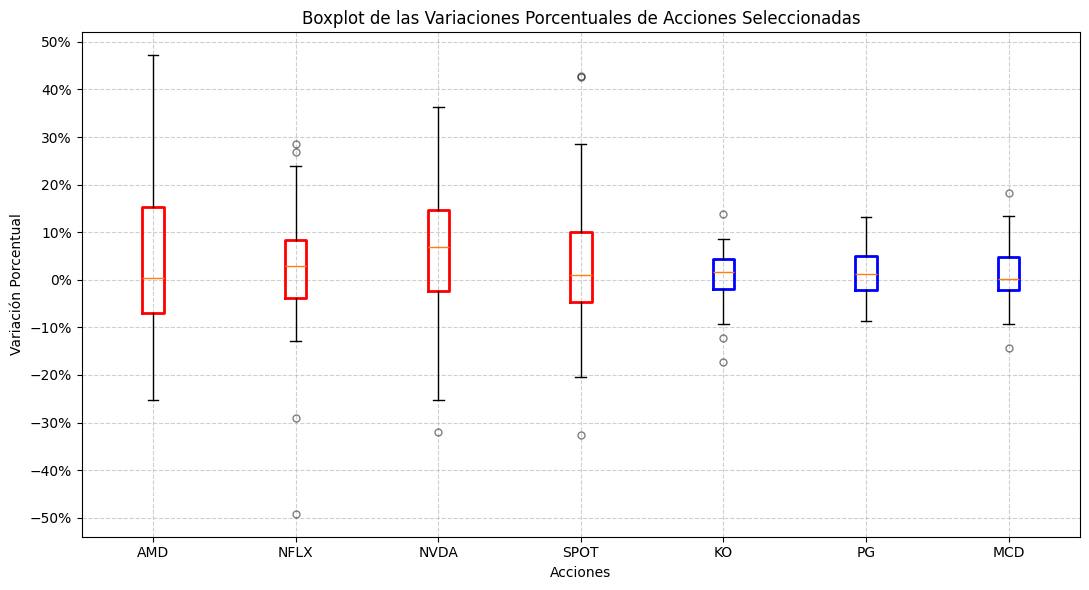

In [26]:

variac_porcent_gral_filtrado = variac_porcent_gral[['AMD','NFLX','NVDA','SPOT', 'KO','PG','MCD']]

plt.figure(figsize=(11,6))

# Color rojo para acciones de riesgo y azul para conservadoras
colors = {'AMD': 'red', 'NFLX': 'red', 'NVDA': 'red', 'SPOT': 'red', 
          'KO': 'blue', 'PG': 'blue', 'MCD': 'blue'}

# Crear boxplots individuales para cada grupo de acciones con colores diferentes
boxprops = dict(linestyle='-', linewidth=2)
flierprops = dict(marker='o', color='black', markersize=5, alpha=0.5)

for accion in variac_porcent_gral_filtrado.columns:
    plt.boxplot(variac_porcent_gral_filtrado[accion], positions=[list(variac_porcent_gral_filtrado.columns).index(accion)], 
                boxprops=dict(color=colors[accion], **boxprops), flierprops=flierprops)

# Configurar el gráfico
plt.xticks(range(len(variac_porcent_gral_filtrado.columns)), variac_porcent_gral_filtrado.columns)
plt.title('Boxplot de las Variaciones Porcentuales de Acciones Seleccionadas')
plt.xlabel('Acciones')
plt.ylabel('Variación Porcentual')
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar las escalas porcentuales en el eje y
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(0.1))  # Escala cada 10%

plt.tight_layout()
plt.show()



In [27]:
# Filtrar los datos de las acciones del portafolio
acciones_cartera = ['AMD','PG', 'SPOT','JNJ','NVDA','WMT','BABA','KO','NFLX','VZ','META','MCD','CRM','MRK']
variac_porcent_portafolio = variac_porcent_gral[acciones_cartera]

# Calcular la matriz de covarianza anualizada
matriz_covarianza_anual = variac_porcent_portafolio.cov() * 12

# Definir las proporciones de cada acción en el portafolio (todas iguales)
proporciones = np.array([1/len(acciones_cartera)] * len(acciones_cartera))

# Calcular el rendimiento esperado mensual y anualizado del portafolio
rendimiento_esperado_mensual = variac_porcent_portafolio.mean()
rendimiento_esperado_anual = (1 + rendimiento_esperado_mensual) ** 12 - 1

# Calcular el rendimiento esperado del portafolio
rendimiento_esperado_portafolio = np.dot(proporciones, rendimiento_esperado_anual)

# Calcular la varianza del portafolio
varianza_portafolio = np.dot(proporciones.T, np.dot(matriz_covarianza_anual, proporciones))

# Calcular el desvío estándar anualizado del portafolio
desv_std_portfolio_anual = np.sqrt(varianza_portafolio)

# Imprimir los resultados
print(f"Rendimiento Esperado Anual del Portafolio: {rendimiento_esperado_portafolio:.4f}")
print(f"Desvío Estándar Anualizado del Portafolio: {desv_std_portfolio_anual:.4f}")


Rendimiento Esperado Anual del Portafolio: 0.2699
Desvío Estándar Anualizado del Portafolio: 0.1895


#### TESTEO DE LA CARTERA SELECCIONADA EN AÑO DE ALTA VOLATILIDAD (2022)

Realizaremos un testeo de la cartera seleccionada para evaluar su comportamiento, retorno y desviación estándar durante el año 2022, que fue un año de alta volatilidad.

In [28]:

acciones_cartera = ['AMD','PG', 'SPOT','JNJ','NVDA','WMT','BABA','KO','NFLX','VZ','META','MCD','CRM','MRK']
variac_porcent_portafolio = variac_porcent_gral[acciones_cartera]
variac_porcent_portafolio.index = pd.to_datetime(variac_porcent_portafolio.index)

# Filtrar datos para el año 2022
variac_porcent_2022 = variac_porcent_portafolio.loc[variac_porcent_portafolio.index.year == 2022]

# matriz de covarianza a esa fecha
matriz_covarianza_2022 = variac_porcent_2022.cov() * 12

rendimiento_esperado_mensual_2022 = variac_porcent_2022.mean()
rendimiento_esperado_anual_2022 = (1 + rendimiento_esperado_mensual_2022) ** 12 - 1

# Definir las proporciones de cada acción en el portafolio (todas iguales)
cant_acciones = len(acciones_cartera)
# Crear una lista con la propocion de cada portfolio
proporcion = np.array([1/cant_acciones] * cant_acciones) #esto me permite mas adelante me permite usar la transposicion para poder calcular varianza del Portfolio

# Calcular el rendimiento esperado del portafolio para 2022
rendimiento_esperado_portafolio_2022 = np.dot(proporcion, rendimiento_esperado_anual_2022)

varianza_portafolio_2022 = np.dot(proporcion.T, np.dot(matriz_covarianza_2022, proporcion))

desv_std_portfolio_anual_2022 = np.sqrt(varianza_portafolio_2022)

# Imprimir los resultados
print(f"Rendimiento Esperado Anual del Portafolio en 2022: {rendimiento_esperado_portafolio_2022:.4f}")
print(f"Desvío Estándar Anualizado del Portafolio en 2022: {desv_std_portfolio_anual_2022:.4f}")


Rendimiento Esperado Anual del Portafolio en 2022: -0.1680
Desvío Estándar Anualizado del Portafolio en 2022: 0.2366


#### GRÁFICOS DE RENDIMIENTOS Y RIESGOS ANUALES EN 2022

A continuación se presentan dos gráficos: 
1. Rendimientos anuales de tres acciones volátiles, tres acciones conservadoras y el portafolio en el año 2022.
2. El riesgo (Desviación Estándar) de las mismas acciones y el portafolio durante el mismo periodo.


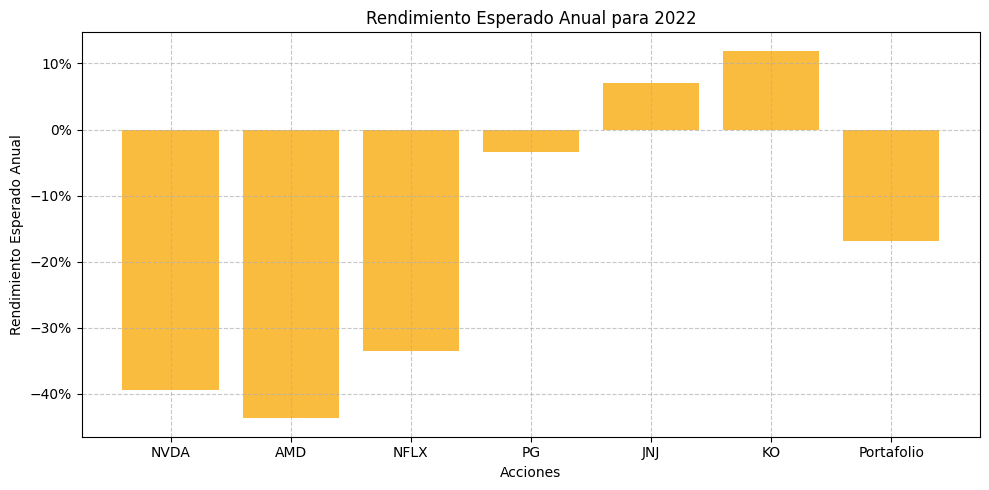

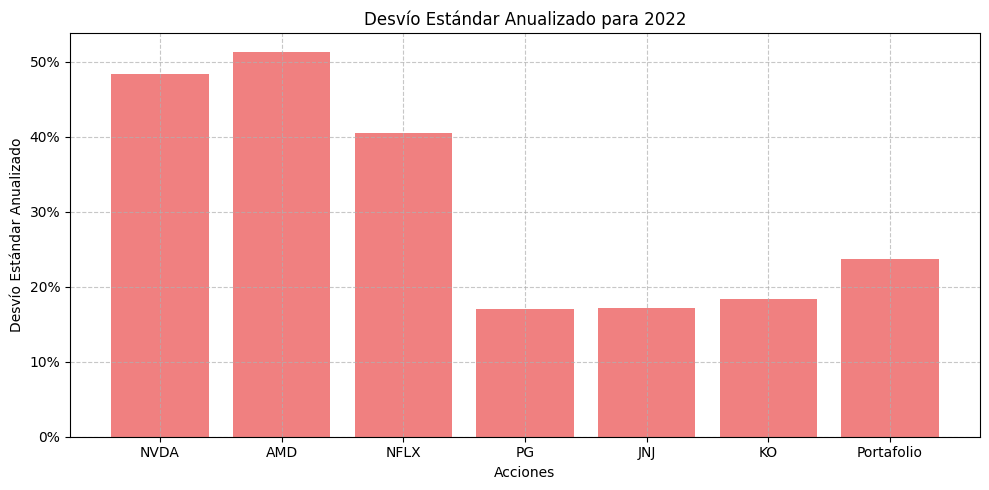

In [29]:

# Datos de rendimiento esperado anual para 2022 de las acciones y el portafolio
rendimiento_esperado_acciones_2022 = rendimiento_esperado_anual_2022[['NVDA', 'AMD', 'NFLX', 'PG', 'JNJ', 'KO']]
nombres_acciones = ['NVDA', 'AMD', 'NFLX', 'PG', 'JNJ', 'KO']
rendimientos_anuales_2022 = rendimiento_esperado_acciones_2022.tolist() + [rendimiento_esperado_portafolio_2022]
nombres_acciones.append('Portafolio')

# Datos de desvío estándar anual para 2022 de las acciones y el portafolio
desv_std_acciones_2022 = desv_std_anual[['NVDA', 'AMD', 'NFLX', 'PG', 'JNJ', 'KO']]
desvios_std_anuales_2022 = desv_std_acciones_2022.tolist() + [desv_std_portfolio_anual_2022]

# Crear gráfico de barras para el rendimiento anual esperado
plt.figure(figsize=(10, 5))
plt.bar(nombres_acciones, rendimientos_anuales_2022, color='#FABC3F')
plt.title('Rendimiento Esperado Anual para 2022')
plt.xlabel('Acciones')
plt.ylabel('Rendimiento Esperado Anual')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.tight_layout()
plt.show()

# Crear gráfico de barras para el desvío estándar anualizado
plt.figure(figsize=(10, 5))
plt.bar(nombres_acciones, desvios_std_anuales_2022, color='lightcoral')
plt.title('Desvío Estándar Anualizado para 2022')
plt.xlabel('Acciones')
plt.ylabel('Desvío Estándar Anualizado')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.tight_layout()
plt.show()
